In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds 

In [2]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRQQ0G5/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRQQ0G5/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRQQ0G5/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s, l in train_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [4]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [5]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = "<OOV>"

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [7]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

In [8]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)), # Bidirectional allos the cell goes in both ways
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 173,825
Trainable params: 173,825
Non-trainable params: 0
_________________________________________________________________


In [9]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 75s 91ms/step - loss: 0.6179 - accuracy: 0.6043 - val_loss: 0.3083 - val_accuracy: 0.8732
Epoch 2/50
782/782 [==============================] - 70s 90ms/step - loss: 0.2858 - accuracy: 0.8831 - val_loss: 0.2918 - val_accuracy: 0.8814
Epoch 3/50
782/782 [==============================] - 71s 91ms/step - loss: 0.2155 - accuracy: 0.9163 - val_loss: 0.3193 - val_accuracy: 0.8760
Epoch 4/50
782/782 [==============================] - 70s 90ms/step - loss: 0.1517 - accuracy: 0.9448 - val_loss: 0.3015 - val_accuracy: 0.8818
Epoch 5/50
782/782 [==============================] - 70s 90ms/step - loss: 0.1010 - accuracy: 0.9652 - val_loss: 0.3538 - val_accuracy: 0.8866
Epoch 6/50
782/782 [==============================] - 71s 91ms/step - loss: 0.0592 - accuracy: 0.9809 - val_loss: 0.4321 - val_accuracy: 0.8733
Epoch 7/50
782/782 [==============================] - 72s 93ms/step - loss: 0.0308 - accuracy: 0.9905 - val_loss: 0.5166 - val_accuracy:

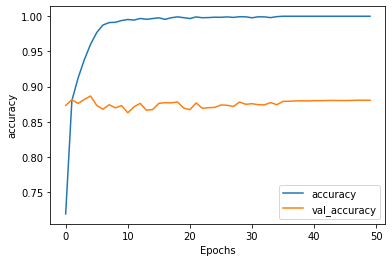

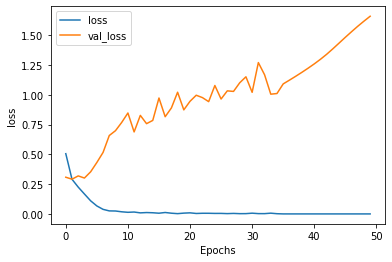

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [11]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [12]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 71s 87ms/step - loss: 0.5824 - accuracy: 0.6584 - val_loss: 0.3059 - val_accuracy: 0.8731
Epoch 2/50
782/782 [==============================] - 67s 86ms/step - loss: 0.2932 - accuracy: 0.8814 - val_loss: 0.2857 - val_accuracy: 0.8836
Epoch 3/50
782/782 [==============================] - 67s 86ms/step - loss: 0.2218 - accuracy: 0.9182 - val_loss: 0.3055 - val_accuracy: 0.8840
Epoch 4/50
782/782 [==============================] - 70s 90ms/step - loss: 0.1723 - accuracy: 0.9379 - val_loss: 0.3029 - val_accuracy: 0.8833
Epoch 5/50
782/782 [==============================] - 67s 86ms/step - loss: 0.1345 - accuracy: 0.9539 - val_loss: 0.3431 - val_accuracy: 0.8850
Epoch 6/50
782/782 [==============================] - 68s 87ms/step - loss: 0.1025 - accuracy: 0.9680 - val_loss: 0.3978 - val_accuracy: 0.8876
Epoch 7/50
782/782 [==============================] - 67s 86ms/step - loss: 0.0808 - accuracy: 0.9742 - val_loss: 0.4104 - val_accuracy:

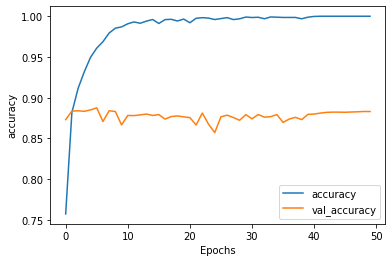

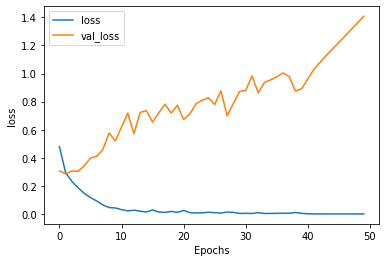

In [13]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [14]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 13s 16ms/step - loss: 0.5374 - accuracy: 0.7040 - val_loss: 0.2979 - val_accuracy: 0.8761
Epoch 2/50
782/782 [==============================] - 12s 16ms/step - loss: 0.2689 - accuracy: 0.8902 - val_loss: 0.2767 - val_accuracy: 0.8859
Epoch 3/50
782/782 [==============================] - 13s 17ms/step - loss: 0.2098 - accuracy: 0.9218 - val_loss: 0.2795 - val_accuracy: 0.8866
Epoch 4/50
782/782 [==============================] - 14s 18ms/step - loss: 0.1702 - accuracy: 0.9376 - val_loss: 0.2829 - val_accuracy: 0.8874
Epoch 5/50
782/782 [==============================] - 13s 16ms/step - loss: 0.1400 - accuracy: 0.9532 - val_loss: 0.2989 - val_accuracy: 0.8900
Epoch 6/50
782/782 [==============================] - 13s 16ms/step - loss: 0.1062 - accuracy: 0.9663 - val_loss: 0.3236 - val_accuracy: 0.8909
Epoch 7/50
782/782 [==============================] - 13s 17ms/step - loss: 0.0857 - accuracy: 0.9751 - val_loss: 0.3712 - val_accuracy:

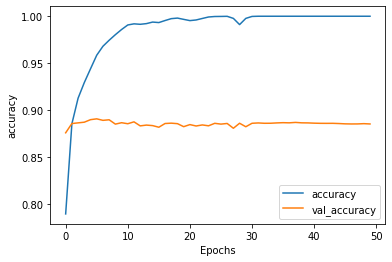

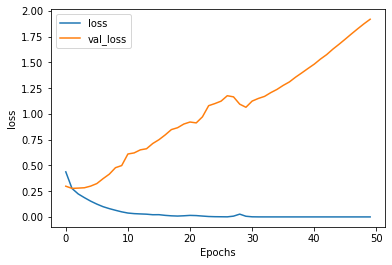

In [16]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')